# Master Data Science Data_VIZ
### WADE El Hadji Malick
### HAYKAL Fayad

## 1. Nettoyage des données 

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

path_School = "/users/mmath/wade/Bureau/Master_DS/Projets/Data_viz/Synthese_donnees_des_semis.csv"
path_Malick = "/home/malick/Bureau/Projets/Projets_Malick_fayad/Data_viz/Synthese_donnees_des_semis.csv"

df = pd.read_csv(path_Malick,  sep='\t',  decimal=",")

df.head(10)

,Bancs,camera,zone,Pop,5_degres_C_TMG_h,5_degres_C_TMG_j,Aire_sous_la_courbe,15_j,16_j,17_j,18_j,19_j,20_j,21_j
0,3.0,1.0,11.0,Témoin,414.00,17.25,2652.0,4.0,16.0,20.0,24.0,32.0,36.0,40.0
1,3.0,2.0,11.0,Témoin,430.86,17.95,2652.0,0.0,4.0,4.0,12.0,24.0,28.0,28.0
2,3.0,3.0,11.0,Témoin,382.86,15.95,2652.0,8.0,12.0,20.0,20.0,20.0,24.0,28.0
3,3.0,4.0,11.0,Témoin,420.00,17.50,2652.0,4.0,4.0,4.0,4.0,12.0,16.0,16.0
4,4.0,1.0,11.0,Témoin,432.89,18.04,2646.0,4.0,4.0,16.0,16.0,24.0,32.0,36.0
5,4.0,2.0,11.0,Témoin,413.82,17.24,2646.0,8.0,12.0,20.0,32.0,36.0,36.0,44.0
6,4.0,3.0,11.0,Témoin,446.80,18.62,2646.0,4.0,4.0,8.0,16.0,20.0,24.0,40.0
7,4.0,4.0,11.0,Témoin,429.60,17.90,2646.0,0.0,0.0,8.0,8.0,12.0,20.0,20.0
8,3.0,1.0,11.0,Témoin,354.22,14.76,5731.2,16.0,28.0,28.0,32.0,36.0,36.0,36.0
9,3.0,2.0,26.0,Témoin,377.78,15.74,5731.2,12.0,20.0,20.0,20.0,32.0,36.0,36.0


In [2]:
print ("Lignes: " ,df.shape[0])
print ("Colonnes: " ,df.shape[1])
print ("\nVariables:\n",df.dtypes)
print ("\nValeurs uniques :  \n",df.nunique())

Lignes:  961
Colonnes:  14

Variables:
 Bancs                  float64
camera                 float64
zone                   float64
Pop                     object
5_degres_C_TMG_h       float64
5_degres_C_TMG_j       float64
Aire_sous_la_courbe    float64
15_j                   float64
16_j                   float64
17_j                   float64
18_j                   float64
19_j                   float64
20_j                   float64
21_j                   float64
dtype: object

Valeurs uniques :  
 Bancs                    2
camera                   4
zone                    24
Pop                      7
5_degres_C_TMG_h       699
5_degres_C_TMG_j       365
Aire_sous_la_courbe    686
15_j                    17
16_j                    20
17_j                    22
18_j                    23
19_j                    23
20_j                    24
21_j                    25
dtype: int64


In [3]:
print ("\nTotal des valeurs manquantes :  ", df.isnull().sum().values.sum())

print("\n",df.isnull().sum())


Total des valeurs manquantes :   15

 Bancs                  1
camera                 1
zone                   1
Pop                    0
5_degres_C_TMG_h       2
5_degres_C_TMG_j       2
Aire_sous_la_courbe    1
15_j                   1
16_j                   1
17_j                   1
18_j                   1
19_j                   1
20_j                   1
21_j                   1
dtype: int64


On voit que notre jeux de données posséde des lignes avec avec au moins un e valeur manquante.  
On choisit de les supprimer, ce qui représente une perte de 2 lignes d'observations de données

In [4]:
Perte_de_donnees = df.shape[0]
df = df.dropna()

Perte_de_donnees = (Perte_de_donnees - df.shape[0])/100

print("En supprimant les lignes avec des valeurs manquantes, on a une perte de données de ", Perte_de_donnees,"%")

En supprimant les lignes avec des valeurs manquantes, on a une perte de données de  0.02 %


In [5]:
df.isnull().sum()

Bancs                  0
camera                 0
zone                   0
Pop                    0
5_degres_C_TMG_h       0
5_degres_C_TMG_j       0
Aire_sous_la_courbe    0
15_j                   0
16_j                   0
17_j                   0
18_j                   0
19_j                   0
20_j                   0
21_j                   0
dtype: int64

In [6]:
import seaborn as sns

Col_pairplot = ["5_degres_C_TMG_h", "5_degres_C_TMG_j", "Aire_sous_la_courbe", "15_j", "16_j", "17_j", "18_j", "19_j", "20_j", "21_j"]

# sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(df[Col_pairplot])

## 2. Réduction de dimensions

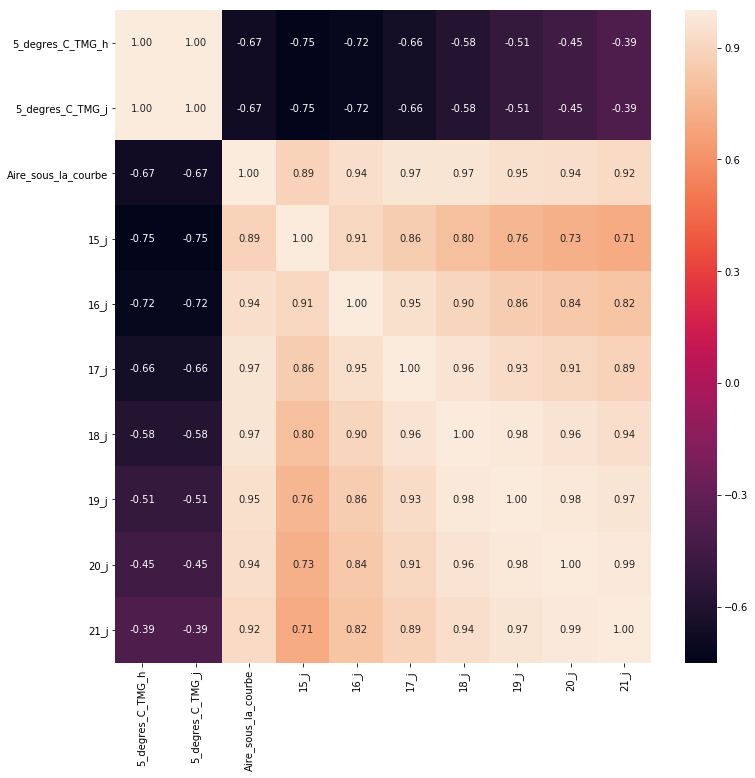

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(12, 12))

sns.heatmap(round(df[Col_pairplot].corr(),2), annot=True, fmt=".2f")
plt.show()

In [8]:
df.drop(["5_degres_C_TMG_h"], axis = 1, inplace = True) 

### a. ACP compléte      

In [9]:
#classe pour standardisation(On centre et réduis nos valeurs)
from sklearn.preprocessing import StandardScaler

Col_ACP = ["5_degres_C_TMG_j", "Aire_sous_la_courbe", "15_j", "16_j", "17_j", "18_j", "19_j", "20_j", "21_j"]

#instanciation
sc = StandardScaler()

#transformation – centrage-réduction
df_ACP = sc.fit_transform(df[Col_ACP])

In [10]:
#vérification

#moyenne
print(np.around(np.mean(df_ACP,axis=0),3))

[ 0.  0. -0.  0.  0.  0.  0.  0. -0.]


In [11]:
#écart-type
print(np.std(df_ACP,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [12]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation
acp = PCA(n_components=2)
acp.fit(df_ACP)
#calculs
ACP_complete = acp.transform(df_ACP)

#nombre de composantes calculées
print(acp.n_components_) 

2


In [13]:
#proportions de variance associées aux axes
acp.explained_variance_ratio_

array([0.85946909, 0.09887898])

On voit que Les deux premières composantes accapare 95.83% de l’information disponible.

In [14]:
ACP_complete

array([[-2.11374318, -0.52357379],
       [-3.6345029 , -0.74355217],
       [-2.49429064,  1.03589433],
       ...,
       [ 0.63619065, -0.09865028],
       [ 0.47884863, -0.84489227],
       [ 7.15594019,  1.03946901]])

In [15]:
dataframe = pd.DataFrame(ACP_complete, columns=['X1','X2']) 

In [16]:
Col = ["Bancs", "camera", "zone", "Pop"]
df_ACP_complete = pd.concat([df[Col], dataframe], axis=1)

In [17]:
df_ACP_complete.head()

,Bancs,camera,zone,Pop,X1,X2
0,3.0,1.0,11.0,Témoin,-2.113743,-0.523574
1,3.0,2.0,11.0,Témoin,-3.634503,-0.743552
2,3.0,3.0,11.0,Témoin,-2.494291,1.035894
3,3.0,4.0,11.0,Témoin,-4.198362,0.291485
4,4.0,1.0,11.0,Témoin,-3.049244,-0.927663


### a. ACP partielle 

In [18]:
Col_ACP = ["15_j", "16_j", "17_j", "18_j", "19_j", "20_j", "21_j"]

#instanciation
acp = PCA(n_components=1)

#calculs
acp.fit(df[Col_ACP])
ACP_parielle = acp.transform(df[Col_ACP])

#proportions de variance associées aux axes
print("Proportion de variance associée à la premiére axe:",round(sum(acp.explained_variance_ratio_),4))

Proportion de variance associée à la premiére axe: 0.9243


In [19]:
df_partielle = pd.DataFrame(ACP_parielle, columns=['ACP_j']) 
Col = ["Bancs", "camera", "zone", "Pop", "5_degres_C_TMG_j", "Aire_sous_la_courbe"]
df_ACP_parielle = pd.concat([df[Col], df_partielle], axis=1)

In [20]:
df_ACP_parielle.head()

,Bancs,camera,zone,Pop,5_degres_C_TMG_j,Aire_sous_la_courbe,ACP_j
0,3.0,1.0,11.0,Témoin,17.25,2652.0,-29.347070
1,3.0,2.0,11.0,Témoin,17.95,2652.0,-56.953843
2,3.0,3.0,11.0,Témoin,15.95,2652.0,-46.399069
3,3.0,4.0,11.0,Témoin,17.50,2652.0,-74.363199
4,4.0,1.0,11.0,Témoin,18.04,2646.0,-44.776618


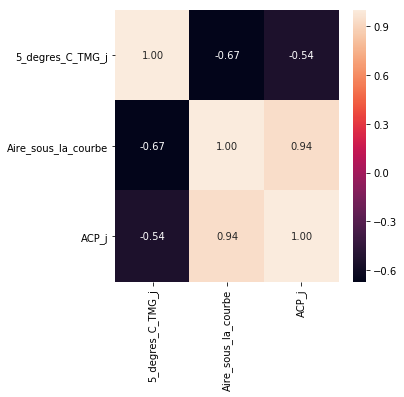

In [21]:
fig = plt.figure(1, figsize=(5, 5))

sns.heatmap(round(df_ACP_parielle[["5_degres_C_TMG_j", "Aire_sous_la_courbe", "ACP_j"]].corr(),2), annot=True, fmt=".2f")
plt.show()

## 3. Graphes

### a. graphe avec une ACP compléte

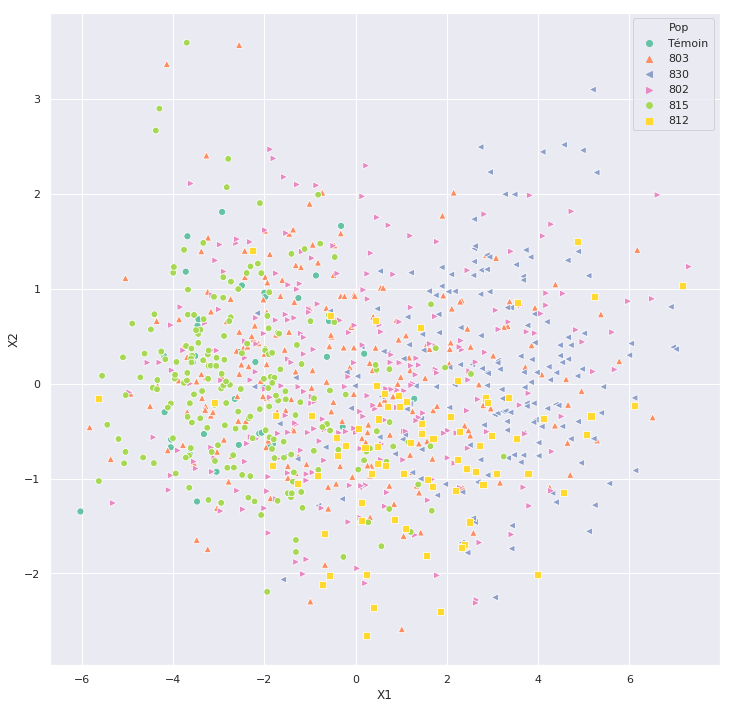

In [22]:
Y = ["Bancs", "camera", "zone", "Pop"]
i = 3

sns.set(style="darkgrid")
filled_markers = ('o', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(12,12))
sns.scatterplot(x="X1", y="X2", hue=Y[i], style = Y[i], palette="Set2", markers=filled_markers, data=df_ACP_complete, s =50)

### b. graphe avec une ACP partielle

In [23]:
df_ACP_parielle.head()

,Bancs,camera,zone,Pop,5_degres_C_TMG_j,Aire_sous_la_courbe,ACP_j
0,3.0,1.0,11.0,Témoin,17.25,2652.0,-29.347070
1,3.0,2.0,11.0,Témoin,17.95,2652.0,-56.953843
2,3.0,3.0,11.0,Témoin,15.95,2652.0,-46.399069
3,3.0,4.0,11.0,Témoin,17.50,2652.0,-74.363199
4,4.0,1.0,11.0,Témoin,18.04,2646.0,-44.776618


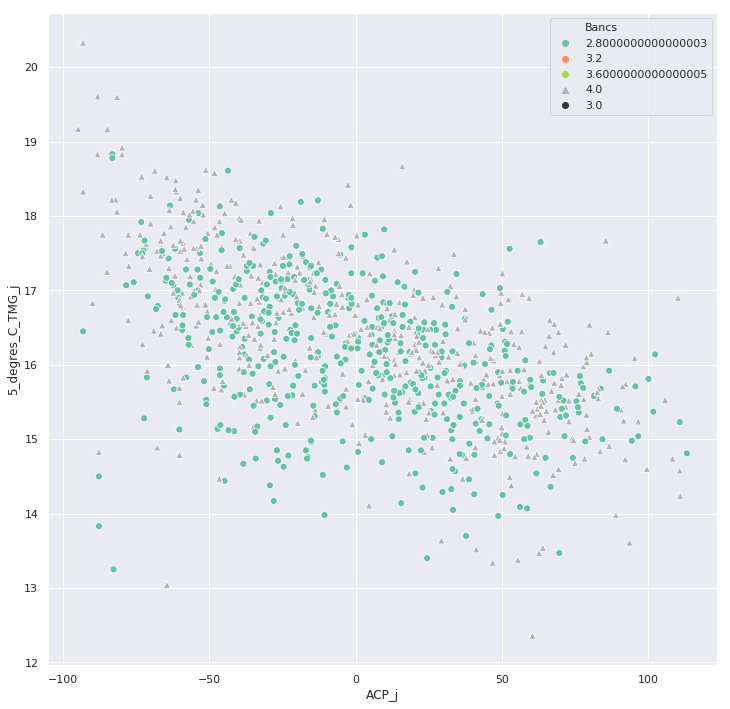

In [24]:
X = ["5_degres_C_TMG_j", "Aire_sous_la_courbe", "ACP_j"]
Y = ["Bancs", "camera", "zone", "Pop"]
i = 0

sns.set(style="darkgrid")
filled_markers = ('o', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(12,12))
sns.scatterplot(x=X[2], y=X[0], hue=Y[i], style = Y[i], palette="Set2", markers=filled_markers, data=df_ACP_parielle, s =50)

## 4. Prédictions avec X(G)Boost

In [25]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    """une simple fonction d'indexation"""
    
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [26]:
Col_X = ["zone", "5_degres_C_TMG_j", "Aire_sous_la_courbe", "15_j", "16_j", "17_j", "18_j", "19_j", "20_j", "21_j"]
Col_Y = ["Bancs", "camera", "Zone", "Pop"]

df = df.apply(lambda x: object_to_int(x))
df[["Bancs", "camera", "zone"]] = df[["Bancs", "camera", "zone"]].astype(int)

df.head()

,Bancs,camera,zone,Pop,5_degres_C_TMG_j,Aire_sous_la_courbe,15_j,16_j,17_j,18_j,19_j,20_j,21_j
0,3,1,11,5,17.25,2652.0,4.0,16.0,20.0,24.0,32.0,36.0,40.0
1,3,2,11,5,17.95,2652.0,0.0,4.0,4.0,12.0,24.0,28.0,28.0
2,3,3,11,5,15.95,2652.0,8.0,12.0,20.0,20.0,20.0,24.0,28.0
3,3,4,11,5,17.50,2652.0,4.0,4.0,4.0,4.0,12.0,16.0,16.0
4,4,1,11,5,18.04,2646.0,4.0,4.0,16.0,16.0,24.0,32.0,36.0


In [27]:
from sklearn.model_selection import train_test_split

X = df[Col_X]
y = df[Col_Y[0]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)

In [28]:
df.dtypes

Bancs                    int64
camera                   int64
zone                     int64
Pop                      int64
5_degres_C_TMG_j       float64
Aire_sous_la_courbe    float64
15_j                   float64
16_j                   float64
17_j                   float64
18_j                   float64
19_j                   float64
20_j                   float64
21_j                   float64
dtype: object

In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from time import time

start = time()

parameters = {
    "learning_rate": np.linspace(0, 0.6, 4),
    "gamma": np.linspace(0, 0.6, 4),
    "min_samples_leaf": [0.005, 0.05,0.01],
    "max_depth": [3, 5, 8],
    "max_features": np.linspace(0, 1, 4),
    "n_estimators":[10, 50, 100, 200],
    }


clf_XGB = GridSearchCV(XGBClassifier(), parameters, cv=5, n_jobs=-1,verbose=10)

clf_XGB.fit(X_train, y_train)

end=time()
train_time_xgb=end-start

print("Train: ",clf_XGB.score(X_train, y_train))
print("Test: ",clf_XGB.score(X_test, y_test))
print("\n")
print(clf_XGB.best_params_)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

Train:  0.7391952309985097
Test:  0.5798611111111112


{'gamma': 0.19999999999999998, 'learning_rate': 0.6, 'max_depth': 3, 'max_features': 0.0, 'min_samples_leaf': 0.005, 'n_estimators': 10}


In [30]:
from sklearn.model_selection import train_test_split

X = df[Col_X]
y = df[Col_Y[1]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from time import time

start = time()

parameters = {
    "learning_rate": np.linspace(0, 0.6, 4),
    "gamma": np.linspace(0, 0.6, 4),
    "min_samples_leaf": [0.005, 0.05,0.01],
    "max_depth": [3, 5, 8],
    "max_features": np.linspace(0, 1, 4),
    "n_estimators":[10, 50, 100, 200],
    }


clf_XGB = GridSearchCV(XGBClassifier(), parameters, cv=5, n_jobs=-1,verbose=10)

clf_XGB.fit(X_train, y_train)

end=time()
train_time_xgb=end-start

print("Train: ",clf_XGB.score(X_train, y_train))
print("Test: ",clf_XGB.score(X_test, y_test))
print("\n")
print(clf_XGB.best_params_)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1070s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Batch comput

[Parallel(n_jobs=-1)]: Done 8842 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 8975 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 9108 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 9243 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 9378 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 9515 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 9652 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 9791 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 9930 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 10071 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 10212 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 10355 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 10498 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 10643 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 10788 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 10935 tasks      | el

Train:  0.5543964232488823
Test:  0.2465277777777778


{'gamma': 0.6, 'learning_rate': 0.39999999999999997, 'max_depth': 3, 'max_features': 0.0, 'min_samples_leaf': 0.005, 'n_estimators': 10}


/home/malick/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
# from sklearn.model_selection import train_test_split

# X = df[Col_X]
# y = df[Col_Y[2]]

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)

# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier
# from time import time

# start = time()

# parameters = {
#     "learning_rate": np.linspace(0, 0.6, 4),
#     "gamma": np.linspace(0, 0.6, 4),
#     "min_samples_leaf": [0.005, 0.05,0.01],
#     "max_depth": [3, 5, 8],
#     "max_features": np.linspace(0, 1, 4),
#     "n_estimators":[10, 50, 100, 200],
#     }


# clf_XGB = GridSearchCV(XGBClassifier(), parameters, cv=5, n_jobs=-1,verbose=10)

# clf_XGB.fit(X_train, y_train)

# end=time()
# train_time_xgb=end-start

# print("Train: ",clf_XGB.score(X_train, y_train))
# print("Test: ",clf_XGB.score(X_test, y_test))
# print("\n")
# print(clf_XGB.best_params_)

In [32]:
from sklearn.model_selection import train_test_split

X = df[Col_X]
y = df[Col_Y[3]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from time import time

start = time()

parameters = {
    "learning_rate": np.linspace(0, 0.6, 4),
    "gamma": np.linspace(0, 0.6, 4),
    "min_samples_leaf": [0.005, 0.05,0.01],
    "max_depth": [3, 5, 8],
    "max_features": np.linspace(0, 1, 4),
    "n_estimators":[10, 50, 100, 200],
    }


clf_XGB = GridSearchCV(XGBClassifier(), parameters, cv=5, n_jobs=-1,verbose=10)

clf_XGB.fit(X_train, y_train)

end=time()
train_time_xgb=end-start

print("Train: ",clf_XGB.score(X_train, y_train))
print("Test: ",clf_XGB.score(X_test, y_test))
print("\n")
print(clf_XGB.best_params_)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1164s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0254s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   17.1s
[Parallel(n_jo

[Parallel(n_jobs=-1)]: Done 8732 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 8865 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 8998 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 9133 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 9268 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 9405 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 9542 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 9681 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 9820 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 9961 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 10102 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 10245 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 10388 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 10533 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 10678 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 10825 tasks      | ela

Train:  0.6318926974664679
Test:  0.3854166666666667


{'gamma': 0.39999999999999997, 'learning_rate': 0.6, 'max_depth': 3, 'max_features': 0.0, 'min_samples_leaf': 0.005, 'n_estimators': 10}


/home/malick/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
